<a href="https://colab.research.google.com/github/Atrib99/Python_Projects/blob/master/EMA21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime, timedelta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
def get_data(symbol, start_date, end_date):
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    return stock_data

In [ ]:
def calculate_ema(data, window):
    return data['Close'].ewm(span=window, adjust=False).mean()

[*********************100%%**********************]  1 of 1 completed


Date
2023-03-29    3.29
2023-03-30    3.29
2023-03-31    3.43
2023-04-03    3.44
2023-04-04    3.32
              ... 
2024-02-23    1.28
2024-02-26    1.35
2024-02-27    1.29
2024-02-28    1.37
2024-02-29    1.38
Name: Close, Length: 113, dtype: float64 Date
2023-03-01    4.43
2023-03-02    4.45
2023-03-03    4.48
2023-03-06    4.21
2023-03-07    4.15
              ... 
2024-02-23    1.28
2024-02-26    1.35
2024-02-27    1.29
2024-02-28    1.37
2024-02-29    1.38
Name: Close, Length: 252, dtype: float64


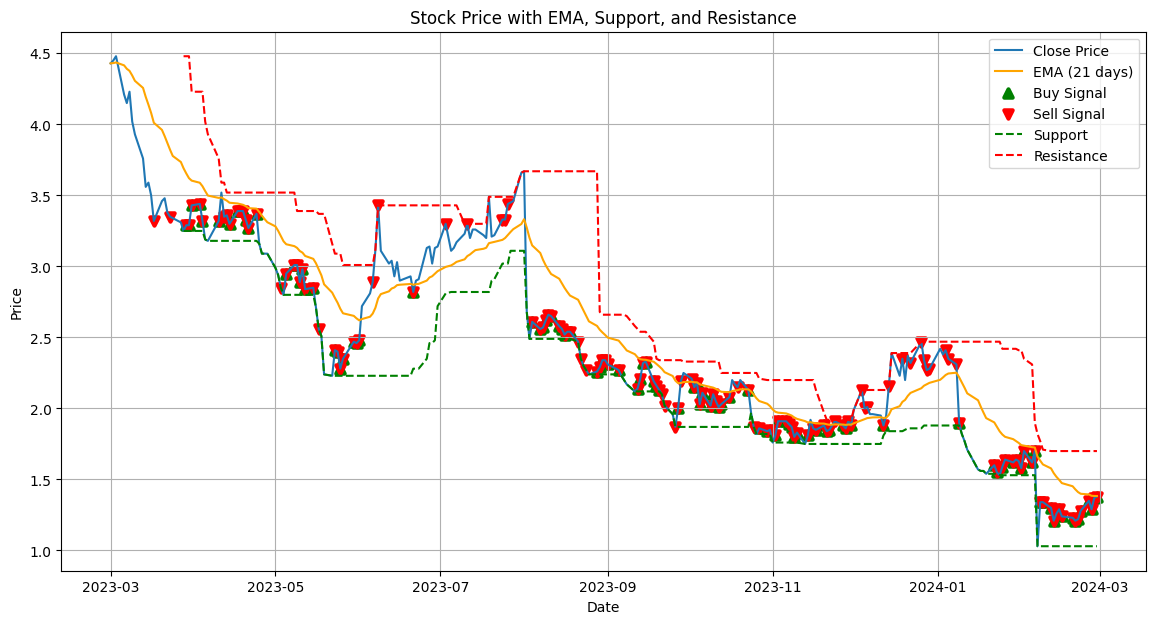

In [ ]:
def forecast_strategy(data):
    data['EMA_21'] = calculate_ema(data, 21)
    data['Support'] = data['Close'].rolling(window=20).min()
    data['Resistance'] = data['Close'].rolling(window=20).max()

    buy_signals = data[(data['Close'] < data['EMA_21']) & (data['Close'] > data['Support'])]
    print(buy_signals['Close'], data['Close'])
    sell_signals = data[data['Close'].isin(buy_signals['Close'])]
    buy_prices = buy_signals['Close'].tolist()
    stop_loss_prices = (0.9 * np.array(buy_prices)).tolist()

    return data, buy_prices, stop_loss_prices, buy_signals, sell_signals
symbol = 'TCS'  # The desired stock symbol
start_date = '2023-03-01'
end_date = '2024-03-01'

stock_data = get_data(symbol, start_date, end_date)
data, buy_prices, stop_loss_prices, buy_signals, sell_signals = forecast_strategy(stock_data)

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['EMA_21'], label='EMA (21 days)', color='orange')
plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='green', label='Buy Signal', lw=3)
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='red', label='Sell Signal', lw=3)
plt.plot(data['Support'], label='Support', linestyle='--', color='green')
plt.plot(data['Resistance'], label='Resistance', linestyle='--', color='red')
plt.title('Stock Price with EMA, Support, and Resistance')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming the DataFrame variable is named 'data'
data.to_csv('stock_data.csv')

# Include buy and sell signals as well
buy_signals.to_csv('buy_signals.csv')
sell_signals.to_csv('sell_signals.csv')
